Modul Disusun Oleh : 


1.   Galih Wasis Wicaksono
2.   Ulfah Nur Oktaviana



# **ARTIFICIAL NEURAL NETWORK**

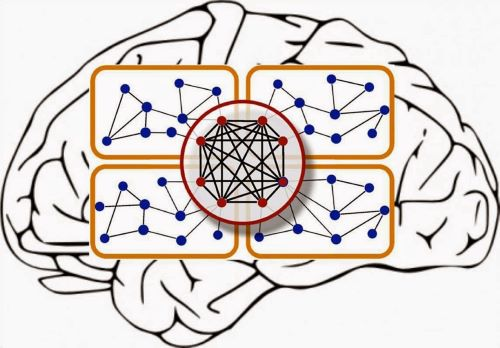



---
**Pengertian ANN (Artificial Neural Network)**

ANN atau biasa disebut juga sebagai Jaringan Syaraf Tiruan (JSS) yang terinspirasi dari jaringan syaraf pada otak manusia, merupakan salah satu algoritma yang biasanya digunakan untuk kasus klasifikasi. algoritma ini termasuk kedalam Supervised Learning sehingga membutuhkan label dan data latih untuk proses pelatihan nantinya. 

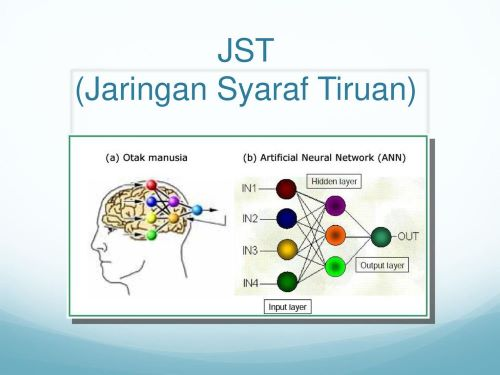









---
**ARSITEKTUR JARINGAN SYARAF TIRUAN**

ANN merupakan sistem komputasi yang terinspirasi dari jaringan syaraf otak. 



*   ANN didasarka pada kumpulan unit terhubung yang disebut arfitificial neuron atau neuron. 
*   setiap koneksi yang terjadi antar neuron dapat mengirimkan sinyal ke neuron lainnya. 


*   Neuron penerima memproses sinyal dan memberi sinyal pada neuron hilir yang terhubung dengannya.
*   Neuron diatur dalam sebuah Layer

1.   Input Layer
2.   Hidden Layer
3.   Output Layer

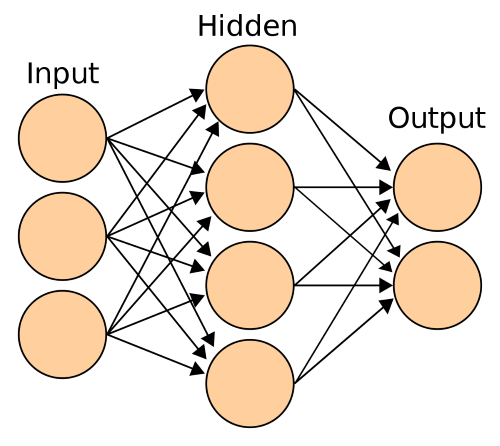






---
**LAYERS**
ANN terdiri atas beberapa layer yang berbeda. layer tersebut diantaranya : 

1.   Dense (Biasa dikenal sebagai Fully Connected Layer)
2.   Convolution Layers
3.   Pooling Layers
4.   Recurrent Layers
5.   Normalization Layers
6.   Many Others











---

**INPUT LAYERS**

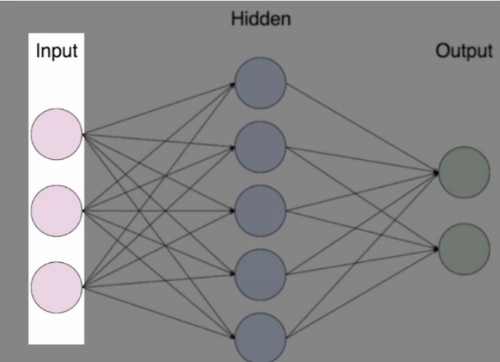



---

**PARAMETER**

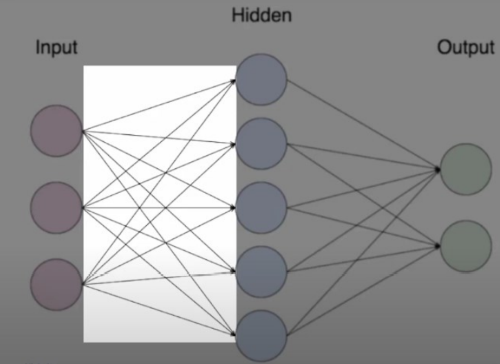



---
**WEIGHT**

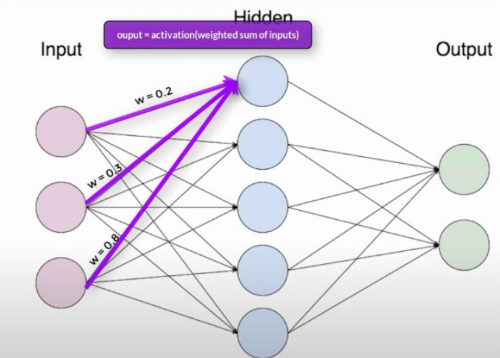



---

**HIDDEN LAYERS**

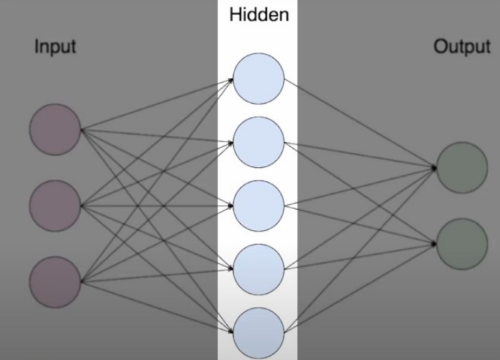



---

**OUTPUT LAYERS**

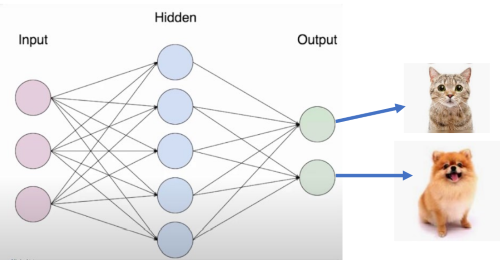

# 1. Download Dataset

In [ ]:
# Mount Google Drive ==> tujuannya untuk menyimpan hasil, maupun mengambil file dari google drive untuk diolah
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Dwonload dataset dan dimasukkan kedalam direktori tmp google colab
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-11-11 07:54:32--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.128, 74.125.69.128, 64.233.182.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   163MB/s    in 0.4s    

2021-11-11 07:54:33 (163 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
# pindahkan dataset ke google drive dengan menggunakan perintah command !mv
# buat folder didalam google drive tempat menyimpan dataset

!mv "/tmp/cats_and_dogs_filtered.zip" "/content/gdrive/MyDrive/Colab Notebooks/Modul Kecerdasan Buatan Pak Galih /5. ANN (Artificial Neural Network)/Dataset"

In [ ]:
# wubah direktori mengarah ke folder dimana dataste berada dengan menggunakan command %cd 

%cd /content/gdrive/MyDrive/Colab Notebooks/Modul Kecerdasan Buatan Pak Galih /5. ANN (Artificial Neural Network)/Dataset

/content/gdrive/MyDrive/Colab Notebooks/Modul Kecerdasan Buatan Pak Galih /5. ANN (Artificial Neural Network)/Dataset


In [ ]:
# cek isi folder dari direktori saat ini
!ls

cats_and_dogs_filtered.zip


In [ ]:
# unzip file dan menghapus zip file
!unzip \*.zip  && rm *.zip

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2117.

# 2. ANALYZE DATASET

In [ ]:
# lakukan pengecekan terhadap jumlah data. dimana dalam kasus ini dataset telah dibagai menjadi 2 bagian 
# diantaranya : training set, dan validation set. 

import os

train_dir = "/content/gdrive/MyDrive/Colab Notebooks/Modul Kecerdasan Buatan Pak Galih /5. ANN (Artificial Neural Network)/Dataset/cats_and_dogs_filtered/train"
val_dir = "/content/gdrive/MyDrive/Colab Notebooks/Modul Kecerdasan Buatan Pak Galih /5. ANN (Artificial Neural Network)/Dataset/cats_and_dogs_filtered/validation"

cat_train_path = train_dir + '/cats'
dog_train_path = train_dir + '/dogs'
cat_val_path = val_dir + '/cats'
dog_val_path = val_dir + '/dogs'

cat_len_train = len(os.listdir(cat_train_path))
dog_len_train = len(os.listdir(dog_train_path))
cat_len_val = len(os.listdir(cat_val_path))
dog_len_val = len(os.listdir(dog_val_path))

print("jumlah dataset Training : ", cat_len_train + dog_len_train)
print("jumlah dataset validasi : ", cat_len_val + dog_len_val)
print("\n\n")
print("jumlah train kelas Cat : ", cat_len_train)
print("jumlah train kelas Dog : ", dog_len_train)
print("jumlah validasi kelas Cat : ", cat_len_val)
print("jumlah validasi kelas Dog : ", dog_len_val)


jumlah dataset Training :  2000
jumlah dataset validasi :  1000



jumlah train kelas Cat :  1000
jumlah train kelas Dog :  1000
jumlah validasi kelas Cat :  500
jumlah validasi kelas Dog :  500


In [ ]:
# lakukan pengecekan terhadap format nama dan ekstensi dari gambar
train_cat_fnames = os.listdir( cat_train_path )
train_dog_fnames = os.listdir( dog_train_path )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.127.jpg', 'cat.126.jpg', 'cat.125.jpg', 'cat.124.jpg', 'cat.123.jpg', 'cat.122.jpg', 'cat.121.jpg', 'cat.120.jpg', 'cat.119.jpg', 'cat.118.jpg']
['dog.127.jpg', 'dog.126.jpg', 'dog.125.jpg', 'dog.124.jpg', 'dog.123.jpg', 'dog.122.jpg', 'dog.121.jpg', 'dog.120.jpg', 'dog.119.jpg', 'dog.118.jpg']


untuk kedua kelas dataset Training berjumlah 2000 data, sedangkan dataset Validation berjumlah 1000 data. sekarang mari melihat gambar yang akan dilatih, pertama-tama import terlebih dahulu library yang dieprlukan

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# parameter dari visualisasi dimana terdiri atas 4 baris dan 4 kolom
nrows = 4
ncols = 4

pic_index = 0 # inisialisasi nilai awal untuk melakukan iterasi

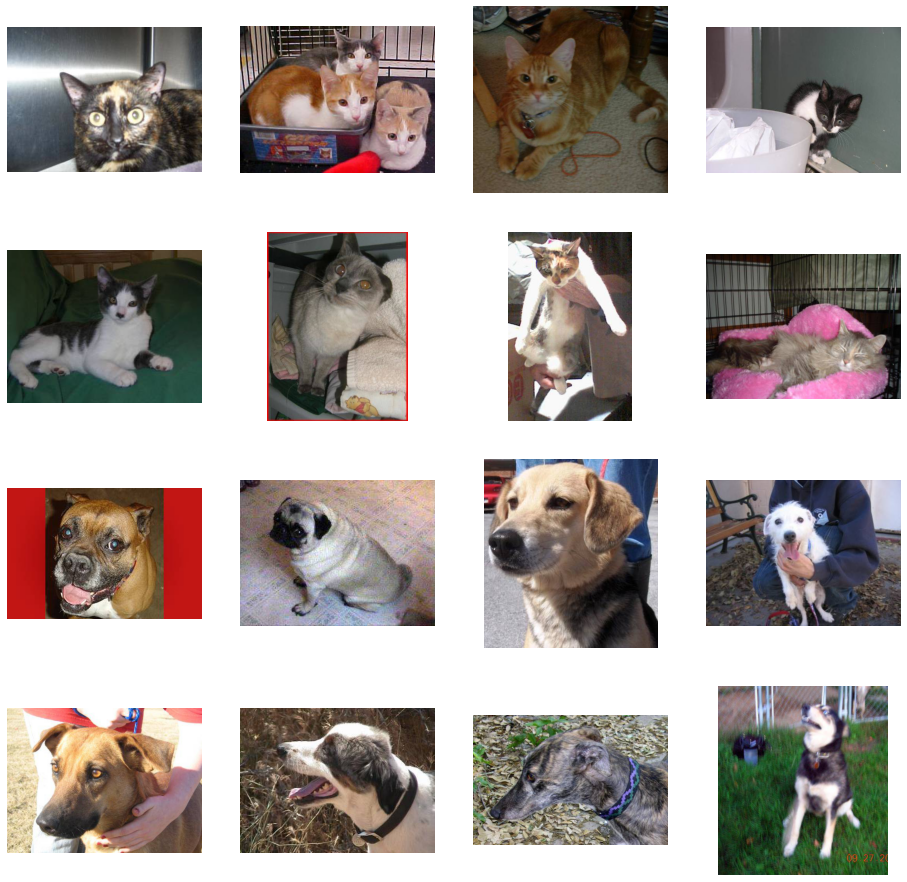

In [ ]:
# mengatur matplotlib fig, dan ukuran visualisasi ke 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(cat_train_path, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(dog_train_path, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # menyeting subplot
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # tidak menampilkan axes (atau gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


dari gambar overview yang ditampilkan diatas dapat diambil informasi bahwa ukuran dari masing-masing gambar berbeda. oleh karenanya perlu disetarakan ke ukuran yang sama terlebih dahulu

# 3. DATA PREPROCESSING

mempersiapkan generator untuk melakukan 

*   preprocessing dataset. Pada kasus ini akan digunakan 2 jenis generator: generator pertama digunakan pada dataset Training, sedangkan generator kedua digunakan pada dataset validation. 
*   langkah pertama, adalah melakukan normalisasi pada piksel imagage. seperti yang telah diketahui image terdiri dari piksel-piksel yang memiliki range (0 hingga 255). dalam proses ini akan dilakukan normalisasi sehingga range pada piksel akan enjadi (0 hingga 1) dengan membagi piksel dengan angka 255.
*   menggunakan library Keras memungkinkan untuk melakukan normalisasi gambar secara keseluruhan dengan menggunakan keras.preprocessing.image.ImageDataGenerator dan menggunakan rescale parameter yang sudah terinclude didalamnya. 








In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# semua image akan di normalisasi dengan membagi 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images dalam 20 batches menggunakan train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images dalam 20 batches menggunakan test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(val_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Build Architecture Model

In [ ]:
# import library yang dibutuhkan
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
# Model dengan 1 input layer, 1 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(150, 150, 3)) # layer input
x = layers.Flatten()(img_input) 
x = layers.Dense(125, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)

Noted : 


*   Flatten Layers ==> mengubah image yang sebelumnya berbentuk n-dimensi menjadi satu dimensi. 
*   Dense Layers ==>  Menambahkan Lapisan Neuron. setiap lapisan neuron membutuhkan fungsi aktivasi untuk memberitahu mereka apa yang harus dilakukan. salah satu fungsi aktivasi yang sering digunakan pada Dense Layer adalah ReLu
*   Relu ==> secara singkat berarti "Jika nilai X>0 maka mengembalikan X, jika sebaliknya maka mengembalikan nilai 0". jadi yang dilakukan pada dasarnya adalah meneruskan nilai 0 atau lebih besar ke layer berikutnya. 
*   Karena pada kasus ini adalah klasifikasi dua kelas maka arsitektur diakhiri dengan activation sigmoid, sehingga output dari jaringan/model akan menjadi skalar tunggal yaitu antara 0 dan 1 (dimana label 1 merupakan kelas yang berbeda dengan label 0)





In [ ]:
# Print model summary
print(model.summary())

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 flatten_6 (Flatten)         (None, 67500)             0         
                                                                 
 dense_21 (Dense)            (None, 125)               8437625   
                                                                 
 dense_22 (Dense)            (None, 1)                 126       
                                                                 
Total params: 8,437,751
Trainable params: 8,437,751
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from tensorflow.keras.optimizers import RMSprop


Tahap berikutnya adalah Mendefinisikan model dan benar-benar membangunnya. pelatihan dimulai dengan mengkompilasi dengan beberapa fungsi optimizer dan loss. kemudian melatih dengan memanggil "model.fit". proses ini akan meminta proses pembelajaran untuk menyesuaikan training set dengan label gambar. dengan istilah lain adalah mencari hubungan diantara training set dan lebelnya. sehingga dimasa mendatang jika melakukan klasifikasi dengan data yang mirip dengan training set, maka model dapat mengklaisifikasi sesuai dengan label yang dihasilkan selama proses pelatihan model.


In [ ]:
# Compile model

model.compile(optimizer=RMSprop(lr=1e-4), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  #  images = batch_size * steps
)

Epoch 1/100
100/100 [==============================] - 17s 162ms/step - loss: 1.9992 - acc: 0.4895 - val_loss: 1.0920 - val_acc: 0.5040
Epoch 2/100
100/100 [==============================] - 16s 160ms/step - loss: 1.2798 - acc: 0.5375 - val_loss: 1.1472 - val_acc: 0.5050
Epoch 3/100
100/100 [==============================] - 16s 161ms/step - loss: 1.3463 - acc: 0.5455 - val_loss: 1.2052 - val_acc: 0.5070
Epoch 4/100
100/100 [==============================] - 16s 163ms/step - loss: 1.3101 - acc: 0.5350 - val_loss: 0.7005 - val_acc: 0.5680
Epoch 5/100
100/100 [==============================] - 16s 160ms/step - loss: 1.2699 - acc: 0.5385 - val_loss: 0.9439 - val_acc: 0.5320
Epoch 6/100
100/100 [==============================] - 16s 161ms/step - loss: 1.1051 - acc: 0.5555 - val_loss: 0.7091 - val_acc: 0.5810
Epoch 7/100
100/100 [==============================] - 16s 161ms/step - loss: 1.1414 - acc: 0.5525 - val_loss: 0.7142 - val_acc: 0.5870
Epoch 8/100
100/100 [===========================

Setelah proses pelatihan selesai maka nilai accuracy (acc) akan terlihat, dimana nilai akurasi seperti 0.9315. hal ini memberitahu anda bahwa jaringan syaraf atau model yang dibuat sekitar 93% akurat dalam mengklasifikasikan data pelatihan (training set).  

# Model Evaluation




---
Langkah 1:

1.   Menggunakan Grafik Training & Validation 
2.   MENggunakan Grafik Training & Validation Loss


Text(0.5, 1.0, 'Training and validation loss')

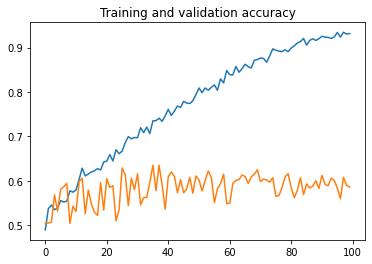

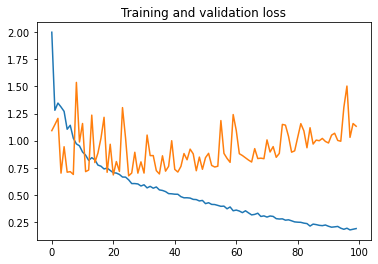

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )



---
Langkah 2 : Menggunakan Confusion Matrix


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report
import seaborn as sns
sns.set(style='whitegrid')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]


Accuracy  : 0.506
Precision : 0.5070377599279333
f1Score : 0.48709216559239815
[[349 151]
 [343 157]]


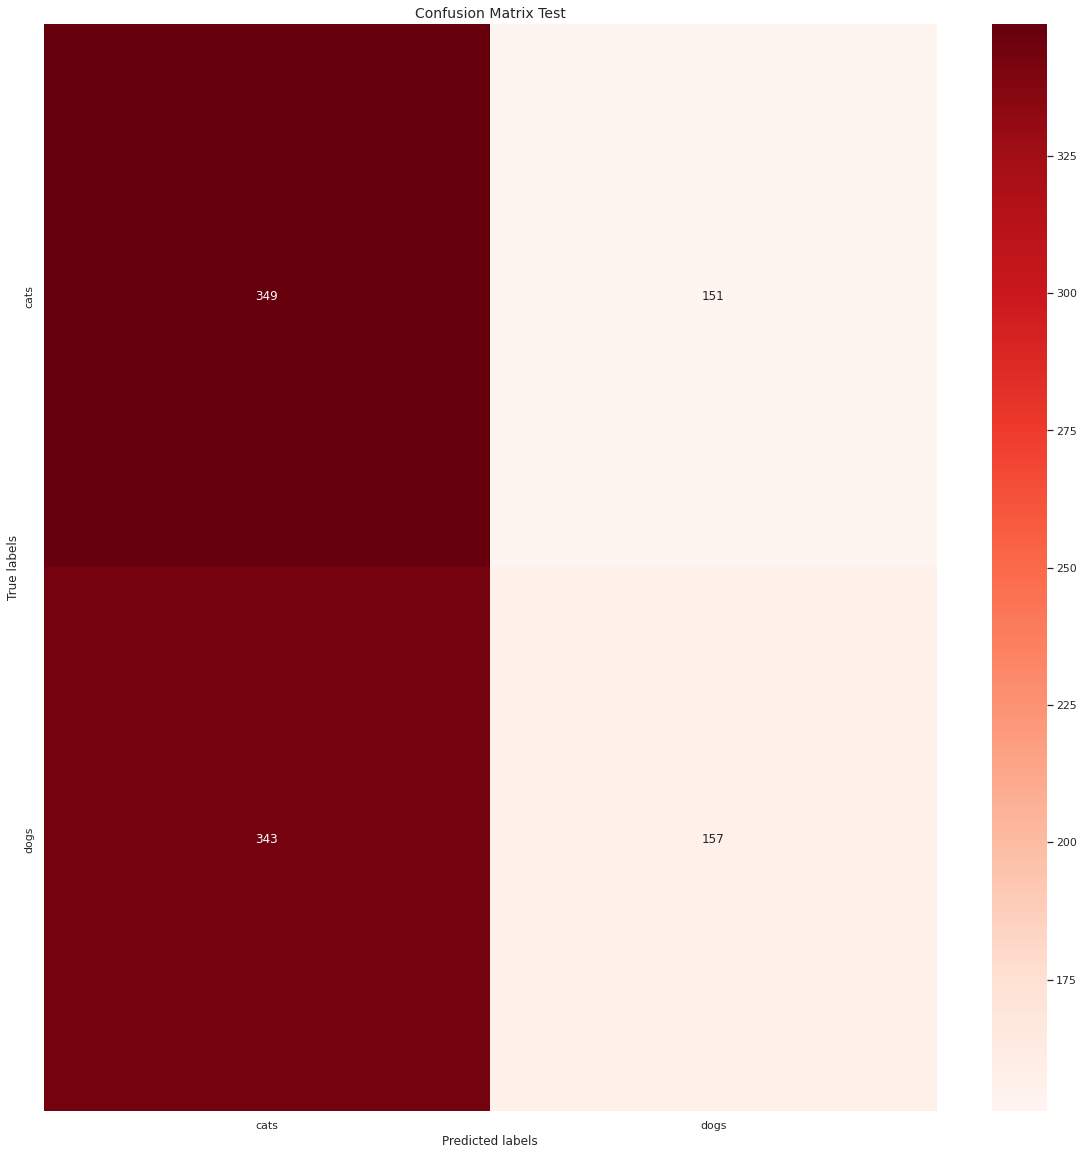

In [ ]:
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1Score


predictions = model_1.predict_generator(generator=validation_generator)
yPredictions = predictions > 0.5
true_classes = validation_generator.classes
class_names = validation_generator.class_indices
Cmatrix_test = confusion_matrix(true_classes, yPredictions)

testAcc,testPrec, testFScore = my_metrics(true_classes, yPredictions)

plt.figure(figsize=(20,20))
ax= plt.subplot()
data = np.asarray(Cmatrix_test).reshape(2,2)
sns.heatmap(data,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()




---
Langkah 3 : Menggunakan Classification Report


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_classes, yPredictions, target_names=class_names))

              precision    recall  f1-score   support

        cats       0.50      0.70      0.59       500
        dogs       0.51      0.31      0.39       500

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.49      1000
weighted avg       0.51      0.51      0.49      1000



# Save Model & Load

In [ ]:
model.save("/content/gdrive/MyDrive/Colab Notebooks/Modul Kecerdasan Buatan Pak Galih /5. ANN (Artificial Neural Network)/cats_and_dog.h5")

In [ ]:
# loading model to evaluate more depth
from keras.models import load_model
model_path = '/content/gdrive/MyDrive/Colab Notebooks/Modul Kecerdasan Buatan Pak Galih /5. ANN (Artificial Neural Network)/cats_and_dog.h5'
model = load_model(model_path)

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path= fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")
 

Saving cat 1.jpg to cat 1.jpg
Saving cat 2.jpg to cat 2.jpg
Saving cat 3.jpg to cat 3.jpg
Saving cat 4.jpg to cat 4.jpg
Saving cat 5.jpg to cat 5.jpg
Saving dog 1.jpg to dog 1.jpg
Saving dog 2.jpg to dog 2.jpg
Saving dog 3.jpg to dog 3.jpg
Saving dog 4.jpg to dog 4.jpg
Saving dog 5.jpg to dog 5.jpg
[1.]
cat 1.jpg is a dog
[0.]
cat 2.jpg is a cat
[1.]
cat 3.jpg is a dog
[1.]
cat 4.jpg is a dog
[0.]
cat 5.jpg is a cat
[0.]
dog 1.jpg is a cat
[1.]
dog 2.jpg is a dog
[0.]
dog 3.jpg is a cat
[0.]
dog 4.jpg is a cat
[1.]
dog 5.jpg is a dog
